import libraries

In [32]:
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle as pkl
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('data/med_insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.shape

(1338, 7)

In [7]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check numerical distribution

<Figure size 600x500 with 0 Axes>

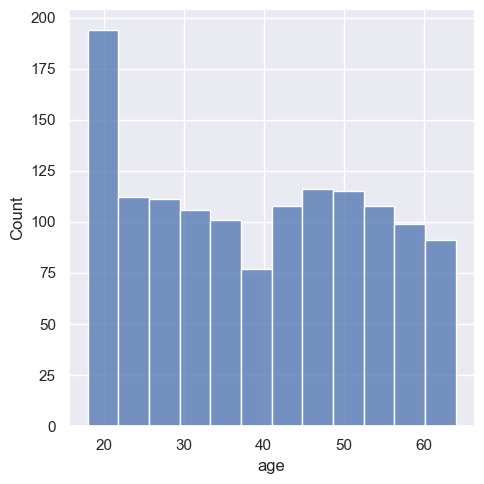

In [8]:
#data distribution for Age column
sns.set()
plt.figure(figsize=(6,5))
sns.displot(data['age'])
plt.show()

<Figure size 600x500 with 0 Axes>

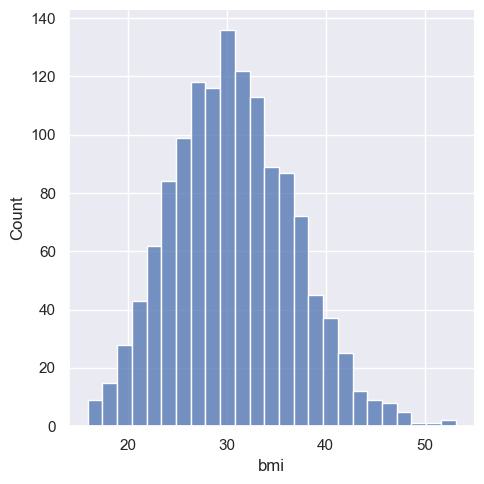

In [9]:
#data distribution for bmi column
sns.set()
plt.figure(figsize=(6,5))
sns.displot(data['bmi'])
plt.show()

<Figure size 600x500 with 0 Axes>

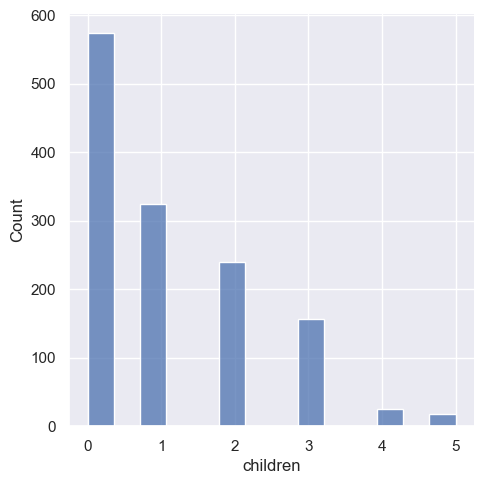

In [10]:
#data distribution for children column
sns.set()
plt.figure(figsize=(6,5))
sns.displot(data['children'])
plt.show()

Check categorical distribution

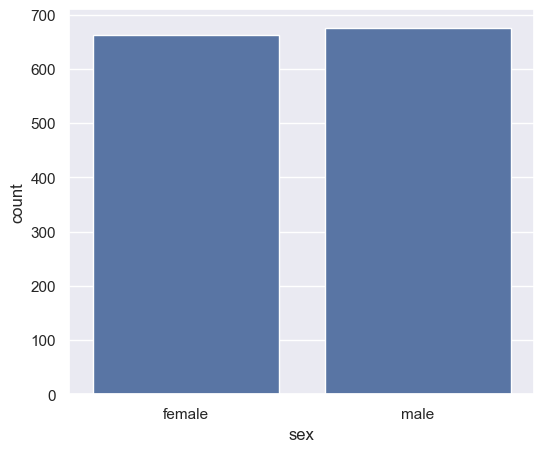

In [11]:
#category data distribution for sex column
sns.set()
plt.figure(figsize=(6,5))
sns.countplot(x = data['sex'], data=data)
plt.show()

In [12]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

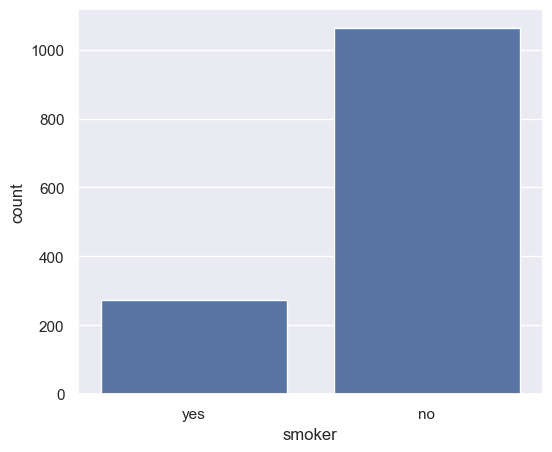

In [13]:
#category data distribution for smoker column
sns.set()
plt.figure(figsize=(6,5))
sns.countplot(x = data['smoker'], data=data)
plt.show()

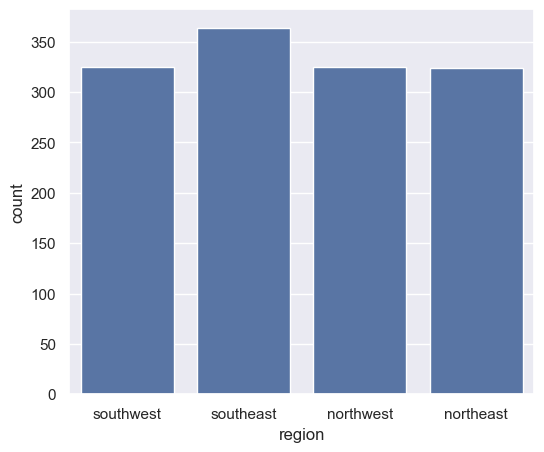

In [14]:
#category data distribution for region column
sns.set()
plt.figure(figsize=(6,5))
sns.countplot(x = data['region'], data=data)
plt.show()

In [15]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Convert categories columns to numerical columns

In [16]:
data.replace({'sex':{'female':0, 'male':1}}, inplace=True)

data.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)

data.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

C:\Users\adegb\AppData\Local\Temp\ipykernel_9036\4251448053.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'sex':{'female':0, 'male':1}}, inplace=True)
C:\Users\adegb\AppData\Local\Temp\ipykernel_9036\4251448053.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)
C:\Users\adegb\AppData\Local\Temp\ipykernel_9036\4251448053.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior

In [17]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
5,31,0,25.740,0,0,0,3756.62160
6,46,0,33.440,1,0,0,8240.58960
7,37,0,27.740,3,0,3,7281.50560
8,37,1,29.830,2,0,2,6406.41070
9,60,0,25.840,0,0,3,28923.13692


slipt dataset into input and output data

In [18]:
x = data.drop(columns='charges')
y = data['charges']

divide data into input and output data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

print splited data shape

In [20]:
x.shape, x_train.shape, x_test.shape 

((1338, 6), (1003, 6), (335, 6))

In [21]:
y.shape, y_train.shape, y_test.shape

((1338,), (1003,), (335,))

model creation

In [22]:
model = RandomForestRegressor(n_estimators=100, max_depth=5) 

Train model

In [23]:
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

model stting

In [24]:
model_test = model.predict(x_test)

In [25]:
model_test

array([ 2667.8552564 ,  7493.00303075,  6241.27320226, 12582.83699787,
        7107.63151182, 13751.97917701, 14764.2575416 , 12799.60784279,
       10517.18645401,  2672.4707841 , 40972.35527948,  8438.8345433 ,
        7665.08487695,  2864.90461195, 12632.98283282, 24225.6893392 ,
        6687.43510485, 10998.51926431,  6622.52667371,  7552.3068956 ,
        7308.8606313 ,  2796.73566099, 10960.38093751, 10646.25282131,
        4512.83306316, 12598.35106023,  6054.99544582, 47719.17602154,
        9095.62079593, 11050.33432327,  2676.89485658, 26938.61184845,
        4151.13674651, 34702.67798963, 12762.84641528, 18026.25181515,
        6851.75686856, 13544.75638144,  2911.37043562, 17465.53556887,
        6655.02196886,  7316.59226827, 24216.76811904,  5802.08850715,
       13816.20688282,  9222.66392799,  5691.66432064, 46022.82924047,
        9973.37396498, 13313.68647258, 26639.09221822,  9236.22776108,
       13871.02003548, 13602.27995273, 12598.35106023,  7730.67218438,
      

evaluate model

In [26]:
r2_score(model_test, y_test)

0.8734234668079993

test the model with external data

In [27]:
test_data = (47, 0, 22, 0, 0, 0)
test_data_array = np.asarray(test_data)
test_data_array = test_data_array.reshape(1,-1)

In [28]:
premium_insurance = model.predict(test_data_array)

c:\Users\adegb\miniconda3\envs\Tensor_Env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [29]:
premium_insurance[0]

10427.158600243174

save model

In [35]:
pkl.dump(model, open('model/MIPM.pkl','wb'))